## 3.1 Machine Learning Intuition

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

def f(x):
    return 2.0 * x + 5.0

def classification_data():
    x1 = np.random.multivariate_normal(mean=[5.0, 0.0], cov=[[3, 0], [0, 1]], size=15)
    y1 = np.array([0 for i in range(15)])
    x2 = np.random.multivariate_normal(mean=[0.0, 0.0], cov=[[1, 0], [0, 3]], size=15)
    y2 = np.array([1 for i in range(15)])
    x = np.concatenate((x1, x2))
    y = np.concatenate((y1, y2))
    return x, y

def regression_data():
    x = np.random.uniform(low=-10.0, high=10.0, size=100)
    y = f(x) + np.random.normal(scale=2.0, size=100)
    return x, y

Regression

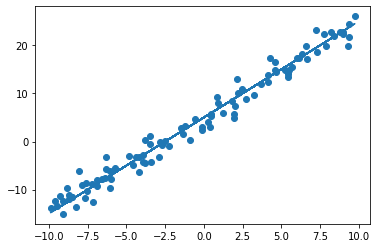

In [3]:
x, y = regression_data()

m = 2
b = 5
y_pred = [m * xi + b for xi in x]

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

Klassifikation

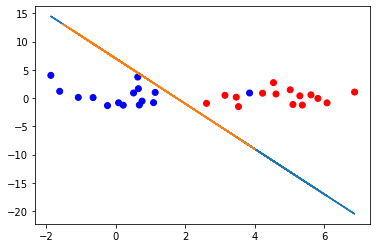

In [4]:
x, y = classification_data()

m = -4
b = 7
border = [m * xi + b for xi in x]

colors = np.array(["red", "blue"])
plt.scatter(x[:,0], x[:,1], color=colors[y[:]])
plt.plot(x, border)
plt.show()

## 3.2 Machine Learning Anwenden

Einfache lineare Regression

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

def f(x):
    return 2.0 * x + 5.0

def classification_data():
    x1 = np.random.multivariate_normal(mean=[5.0, 0.0], cov=[[5, 0], [0, 1]], size=15)
    y1 = np.array([0 for i in range(15)])
    x2 = np.random.multivariate_normal(mean=[0.0, 0.0], cov=[[1, 0], [0, 5]], size=15)
    y2 = np.array([1 for i in range(15)])
    x = np.concatenate((x1, x2))
    y = np.concatenate((y1, y2))
    return x, y


def regression_data():
    x = np.random.uniform(low=-10.0, high=10.0, size=100)
    y = f(x) + np.random.normal(scale=2.0, size=100)
    return x, y

0.9854440134870238


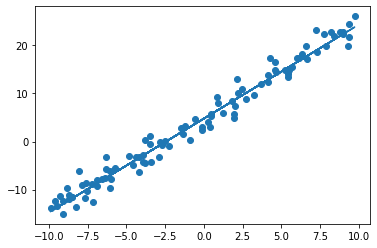

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x, y = regression_data()
x = x.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

regr = LinearRegression()
regr.fit(x_train, y_train) # Training
print(regr.score(x_test, y_test)) # Testing
y_pred = regr.predict(x_test)

plt.scatter(x, y)
plt.plot(x_test, y_pred)
plt.show()

Fehlerfunktionen

R2:  0.9800744405202398
MAE:  1.6412556081191239
MSE:  3.4012816307973344


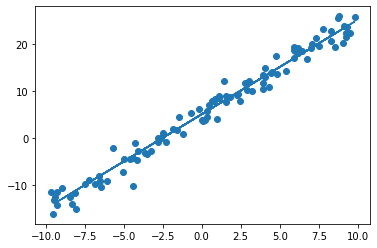

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

x, y = regression_data()
x = x.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

regr = LinearRegression()
regr.fit(x_train, y_train) # Training
y_pred = regr.predict(x_test)

print("R2: ", regr.score(x_test, y_test)) # Testing
print("MAE: ", mae(y_test, y_pred)) # Testing
print("MSE: ", mse(y_test, y_pred)) # Testing

plt.scatter(x, y)
plt.plot(x_test, y_pred)
plt.show()

Unsupervised Learning: PCA Principal Component Analysis

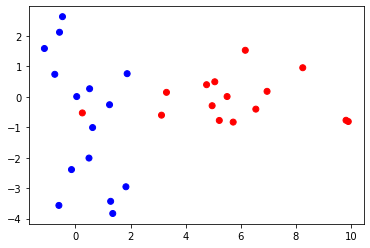

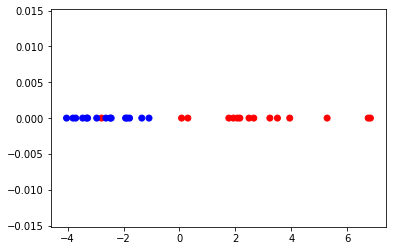

In [14]:
from sklearn.decomposition import PCA

x, y = classification_data()

pca = PCA(n_components=1)
pca.fit(x)
x_transformed = pca.transform(x)

colors = np.array(["red", "blue"])
plt.scatter(x[:,0], x[:,1], color=colors[y[:]])
plt.show()

colors = np.array(["red", "blue"])
plt.scatter(x_transformed, [0 for i in range(len(x_transformed))], color=colors[y[:]])
plt.show()